<center><h1 style="color: rgb(0, 91, 94);">Polynomial Time</h1></center>

<hr style="border-top: 2px solid rgb(0, 91, 94);" />

Within this notebook, I will be discussing <b>Polynomial Time</b> in great detail to understand and comprehend the topic by exploring the following points:

<ul>
    <li>Computational Complexity</li>
    <li>Polynomial Time: Definition</li>
   <li>Complexity Classes</li>
   <li>Turing Machines</li>
  <li>Deterministic Turing Machine</li>
    <li>Non-Deterministic Turing Machine</li>
    <li>Complexity Class: P</li>
     <li>Complexity Class: NP</li>
     <li>Complexity Class: NP</li>
    <li>P versus NP problem</li>
</ul>

<center><h2 style="color: rgb(0, 91, 94);">Computational Complexity Theory</h2></center>

<hr style="border-top: 2px solid rgb(0, 91, 94);" />

To begin discussing Polynomial Time and what relates to the topic, it is important to understand the context of <b>Computational Complexity Theory</b> and how polynomial time relates to it. 

What exactly is computational complexity theory? Computational Complexity Theory can be described as a <u>subfield of computer science or mathematical research</u>, where the goal or wanted outcome is to classify the resources in which are needed to solve computational problems (e.g. time taken).<sup><a href="#references">[1]</a></sup> This helps to classify mathematical problems based on the level of difficulty associated with them (how computationally difficult they are to solve).

We can use <b>time complexity</b> to determine the amount of resources. Time complexity simply defines the amount of time a program takes to run.<sup><a href="#references">[2]</a></sup> For us to determine the relative time it takes for a program to run, (and how much it grows depending on the input data and the number of operations done), we must abide to a certain notation associated with time complexity, which allows us to categorize the growth of an algorithm and how quick it is relative to time when growth occurs. 

<center><h3 style="color: rgb(0, 91, 94);">Big O Notation</h3></center>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<b>Big O Notation</b>, is simply a way to describe the <u>complexity of a given algorithm by comparing them on the number of operations they make</u>. This allows us to disregard complexity specificially in seconds etc., due to the various number of factors which can determine the actual speed of an algorithm (<i>e.g. hardware</i>).<sup><a href="#references">[3]</a></sup> Instead, Big O Notation focuses on the <b><i>worst case scenario</i></b> of an algorithm, or in other words, its upper-bound runtime. <sup><a href="#references">[4]</a></sup>

Big O Notation is described in algebraic terms. For example, certain time complexities can be described within the following terms, where $n$ is the input size:

| Notation | Name   |
|------|------|
|   $O(1)$ | Constant|
|   $O(log n)$ | Logarithmic|
|   $O(n)$ | Linear|
|   $O(n^2)$ | Quadratic|
|   $O(n!)$ | Factorial|

<br>
<center>For a cheatsheet guide to common sorting algorithms and their time complexities, see below: </center>
<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*X1hZCxNdfgZ0sT_2tynPKA.png" width="600px"><a href="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*X1hZCxNdfgZ0sT_2tynPKA.png"><center>Reference</center></a></img>

<br><br>

<center><h4 style="color: rgb(0, 91, 94);">Visualisation (Video)</h4></center>

It is important to be able to visualize the growth of differing time complexities in relation to eachother. Specific algorithms will be classed in various time complexities (e.g bubble sort will have a different growth rate than heapsort). 

The below video even displays the number of comparisons a specific algorithm makes, allowing us to visualize how efficient a specific algorithm is (and how slow specific time complexities are).

In [6]:
# Reference: https://medium.com/@shouke.wei/how-to-embed-youtube-videos-in-the-jupyter-notebook-1a5fbfc0cdc2
from IPython.display import HTML
HTML("""
<div align="center">
    <iframe width="560" height="315"
    src="https://youtube.com/embed/kPRA0W1kECg"
    </iframe>
</div>
""")

Let us compare some time complexities below in Python code as another form of visualization. We'll need two libraries to accurately graph the algorithms as necessary:

<ul>
     <li><b>NumPy</b> (Python package which "offers comprehensive mathematical functions, random number generators, linear algebra routines, etc.") <sup><a href="#references">[5]</a></sup></li> 
    <li><b>Matplotlib</b> (Python library for creating "static, animated, and interactive visualizations") <sup><a href="#references">[6]</a></sup></li> 
</ul>


<center><h4 style="color: rgb(0, 91, 94);">Visualisation (Python): Example of the growth of different time complexities</h4></center>

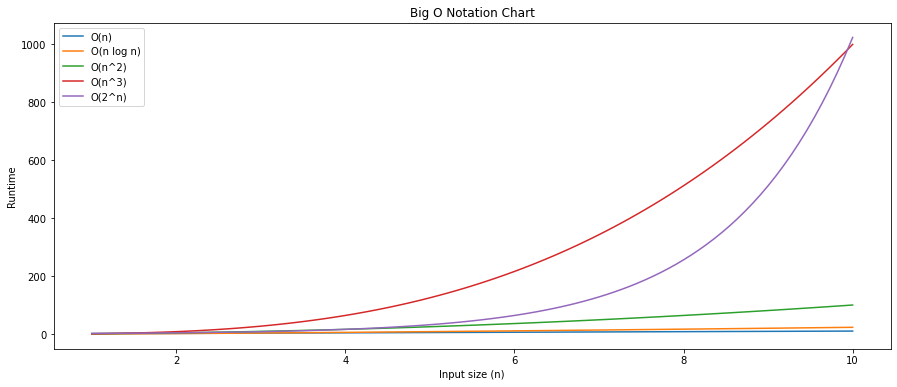

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create arrays of different sizes
n = np.linspace(1, 10, 100)
nlogn = n * np.log(n)
n_squared = n ** 2
n_cubed = n ** 3
two_to_n = 2 ** n

# Create a larger figure
fig = plt.figure(figsize=(15, 6))

# Create a plot of the different Big O notations
plt.plot(n, n, label='O(n)')
plt.plot(n, nlogn, label='O(n log n)')
plt.plot(n, n_squared, label='O(n^2)')
plt.plot(n, n_cubed, label='O(n^3)')
plt.plot(n, two_to_n, label='O(2^n)')

# Add labels and legend
plt.xlabel('Input size (n)')
plt.ylabel('Runtime')
plt.title('Big O Notation Chart')
plt.legend()

# Show the plot
plt.show()

<center><h2 style="color: rgb(0, 91, 94);">Polynomial Time</h2></center>

<hr style="border-top: 2px solid rgb(0, 91, 94);" />
<b>Polynomial Time</b> is an example of a time complexity class, much like the ones in which we previously discussed. Polynomial time complexity is extremely important in discussing complexity classes and turing machines later on so it is favourable to give context to what is meant by an algorithm which is solved in polynomial time.

Polynomial time can be described formally in the following way:

<div class="alert alert-block alert-info">
    <b>Definition:</b> An algorithm is said to have <b>polynomial time complexity</b> if its worst-case running time $Tworst(n)$ for an input of size $n$ is upper bounded by a polynomial $p(n)$ for large enough $n≥n0$. <sup><a href="#references">[7]</a></sup>
</div>

Let's break this definition down further in simpler terms. Essentially what this definition indicates that any algorithm in which its upper bound time complexity or running time (Big O) grows no more than a <i>polynomial function</i> of the given input size $n$. A polynomial function of the size of the input can be shown in this notation: $O(n^k)$, where k is a non-negative constant. <sup><a href="#references">[8]</a></sup>

If we take a look back at our previous table, where we showcased some common time complexities, can we determine if any are considered to be polynomial?

<center><h2 style="color: rgb(0, 91, 94);">Complexity Classes</h2></center>

<hr style="border-top: 2px solid rgb(0, 91, 94);" />

<center><h2 style="color: rgb(0, 91, 94);">Turing Machines</h2></center>

<hr style="border-top: 2px solid rgb(0, 91, 94);" />

<center><h3 style="color: rgb(0, 91, 94);">Deterministic Turing Machine</h3></center>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<center><h3 style="color: rgb(0, 91, 94);">Nondeterministic Turing Machine</h3></center>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<center><h2 style="color: rgb(0, 91, 94);">Complexity Class: P</h2></center>

<hr style="border-top: 2px solid rgb(0, 91, 94);" />

<center><h2 style="color: rgb(0, 91, 94);">Complexity Class: NP</h2></center>

<hr style="border-top: 2px solid rgb(0, 91, 94);" />

<center><h2 style="color: rgb(0, 91, 94);">P versus NP problem</h2></center>

<hr style="border-top: 2px solid rgb(0, 91, 94);" />

<center><h2 style="color: rgb(0, 91, 94);">References</h2></center>

<hr style="border-top: 2px solid rgb(0, 91, 94);" />
<div id="references" class="alert alert-block alert-success">
    <p>
        [1] University of Oxford (Website): <a href="https://www.seh.ox.ac.uk/blog/an-introduction-to-research-in-computational-complexity-theory">An introduction to research in Computational Complexity Theory</a><br><br> 
        [2] Great Learning (Website): <a href="https://www.mygreatlearning.com/blog/why-is-time-complexity-essential/">What is Time Complexity And Why Is It Essential?</a><br><br> 
        [3] Free Code Camp (Website): <a href="https://www.freecodecamp.org/news/big-o-notation-explained-with-examples/">What is Time Complexity And Why Is It Essential?</a><br><br> 
        [4] Simplilearn (Website): <a href="https://www.simplilearn.com/big-o-notation-in-data-structure-article">Introduction to Big O Notation in Data Structure</a><br><br> 
        [5] NumPy (Website): <a href="https://numpy.org">NumPy: Documentation</a><br><br> 
        [6] Matplotlib (Website): <a href="https://matplotlib.org/stable/index.html">Matplotlib: Documentation</a><br><br> 
        [7] MathWiki (Website): <a href="https://mathwiki.cs.ut.ee/asymptotics/05_polynomial_complexity">Polynomial Complexity</a><br><br> 
        [8] East Carolina University (Website): <a href="http://www.cs.ecu.edu/karl/6420/spr16/Notes/P/polytime.html">Polynomial Time</a><br><br>
        [8]Stack Overflow (Website): <a href="http://www.cs.ecu.edu/karl/6420/spr16/Notes/P/polytime.html">Polynomial Time</a><br><br>
    </p>
</div>
